In [2]:
#    CS 422 Group Project - Predicting Housing Prices using KNN, Linear
#       Regression, and SVM
#    @file project.py
#    @members Ryan Parker, Keith Del Rosario, Daniel Shina, Matthew Shiroma


"""All the imports that will be needed for all tasks"""
import statistics as st
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from prettytable import PrettyTable
import matplotlib.pyplot as plt


In [3]:
K_FOLD = 5 # fold value for all functions
K_NEAREST_NEIGHBORS = 10 # the # of neighbors for KNN


In [4]:
def knn_function(features, target):
    """Function that runs KNN and returns mean RMSE"""
    kf = KFold(n_splits=K_FOLD)

    rmse_scores = []

    # Loop through each fold
    for train_index, test_index in kf.split(features):
        # Split the data into training and testing sets for the current fold
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        # Create a KNN Regression model
        knn = KNeighborsRegressor(n_neighbors=K_NEAREST_NEIGHBORS)

        # Train the model on the training data
        knn.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = knn.predict(X_test)

        # Calculate the RMSE score for the fold
        rmse = st.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    return rmse_scores


In [5]:
def linear_regression(features, target):
    """Function performs linear regression on features and target data set"""
    kf = KFold(n_splits=K_FOLD)

    # Create a list to store the RMSE values for each fold
    rmse_scores = []

    # Loop through each fold
    for train_index, test_index in kf.split(features):
        # Split the data into training and testing sets
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        # Create a linear regression model and fit the data
        lr = LinearRegression()
        lr.fit(X_train, y_train)

        # Make predictions on the testing set
        y_pred = lr.predict(X_test)

        # Calculate the RMSE for this fold and add it to the list of RMSE scores
        rmse_fold = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse_fold)

    return rmse_scores


In [6]:
def svm_function(features, target):
    """This function performs svm on a features and target data set"""
    kf = KFold(n_splits=K_FOLD)

    rmse_scores = []

    svm = SVR(kernel="rbf")

    for train_index, test_index in kf.split(features):
        # Split the data into training and testing sets
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        svm.fit(X_train, y_train)

        y_pred = svm.predict(X_test)

        rmse_fold = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse_fold)

    return rmse_scores

In [7]:
def table_printing(knn_scores, linear_scores, svm_scores):
    """Prints the table of outputs using the prettytable module"""
    print("RMSE Result Table for Housing Data Prediction:")

    # the header for the table
    my_table = PrettyTable(["", "KNN", "Linear", "SVM"])

    for row in range(K_FOLD): # goes through every row
        table_array = []
        fold_string = f"Fold {row+1}" # creates an iterated fold string
        table_array.append(fold_string)

        # fills in the column with the correct formatted value
        for col in range(3):
            if col == 0:
                table_array.append(knn_scores[row])
            elif col == 1:
                table_array.append(linear_scores[row])
            elif col == 2:
                table_array.append(svm_scores[row])

        my_table.add_row(table_array) # push the row to the table

    # fills in the last row which is always average
    table_array = []
    table_array.append("Mean")
    table_array.append(np.mean(knn_scores))
    table_array.append(np.mean(linear_scores))
    table_array.append(np.mean(svm_scores))
    my_table.add_row(table_array)

    print(my_table) # prints the table


Running KNN
Running Linear Regression
Running SVM with RBF kernel


KNN Mean RMSE is: 257965.8730070463
Linear Regression Mean RMSE is: 242562.66462760163
SVM Mean RMSE is: 377663.4125677847


RMSE Result Table for Housing Data Prediction:
+--------+--------------------+--------------------+--------------------+
|        |        KNN         |       Linear       |        SVM         |
+--------+--------------------+--------------------+--------------------+
| Fold 1 | 274503.1950609083  | 254519.8320822173  | 399117.61799271137 |
| Fold 2 | 264810.45459310303 | 243269.74161302068 | 382809.30612237734 |
| Fold 3 | 243059.49426571475 | 224112.98045017154 | 349732.74422563665 |
| Fold 4 | 246222.5010899436  | 232418.87913883696 | 366984.54234434327 |
| Fold 5 | 261233.72002556178 | 258491.88985376168 | 389672.85215385485 |
|  Mean  | 257965.8730070463  | 242562.66462760163 | 377663.4125677847  |
+--------+--------------------+--------------------+--------------------+


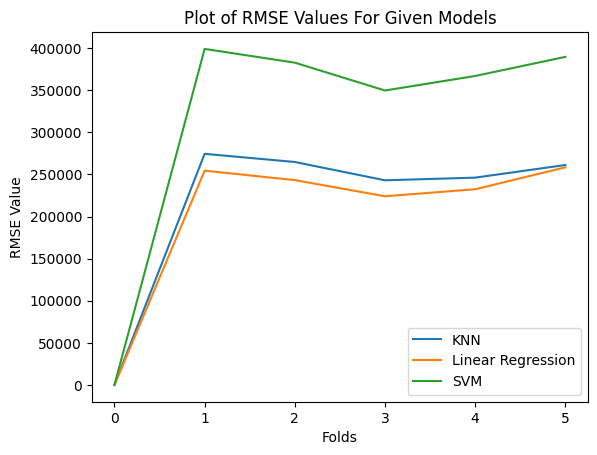

In [8]:
def main():
    """Main function which calls the other functions with the proper data"""
    data = pd.read_csv("kc_final.csv")

    # drops the outlying columns and price
    features = data.drop(["id","date","price", "waterfront", "view", "condition", 
                          "grade", "zipcode", "lat", "long"], axis=1) 
    features.drop(features.columns[[0]], axis=1, inplace=True) # drops the row number column

    target = data["price"]

    # call the functions for every model
    print("Running KNN")
    knn_scores = knn_function(features, target)

    print("Running Linear Regression")
    linear_scores = linear_regression(features, target)

    print("Running SVM with RBF kernel")
    svm_scores = svm_function(features, target)

    print("\n") # formatting

    # print the mean RMSE for each model
    print(f"KNN Mean RMSE is: {np.mean(knn_scores)}")
    print(f"Linear Regression Mean RMSE is: {np.mean(linear_scores)}")
    print(f"SVM Mean RMSE is: {np.mean(svm_scores)}")

    print("\n") # formatting

    # print out the table
    table_printing(knn_scores, linear_scores, svm_scores)

    # inserting a 0 into the beginning of arrays as fold x is index x-1
    knn_scores.insert(0,0)
    linear_scores.insert(0,0)
    svm_scores.insert(0,0)

    plt.plot(knn_scores, label="KNN")
    plt.plot(linear_scores, label="Linear Regression")
    plt.plot(svm_scores, label="SVM")
    plt.legend(loc="best")
    plt.title("Plot of RMSE Values For Given Models")
    plt.xlabel("Folds")
    plt.ylabel("RMSE Value")
    plt.show()

if __name__ == "__main__":
    main()
